# Logistic Regression From Scratch

## Mathematical Foundation

Logistic regression extends linear regression to binary classification by applying the sigmoid activation function:

$$p = \sigma(\mathbf{X}\mathbf{w} + b) = \frac{1}{1 + e^{-(\mathbf{X}\mathbf{w} + b)}}$$

where $\sigma$ is the sigmoid function, mapping logits to probabilities in [0, 1].

### Loss Function: Binary Cross-Entropy

$$L = -\frac{1}{n}\sum_{i=1}^{n}[y_i \log(p_i) + (1-y_i)\log(1-p_i)]$$

With L2 regularization:

$$L = -\frac{1}{n}\sum_{i=1}^{n}[y_i \log(p_i) + (1-y_i)\log(1-p_i)] + \frac{\lambda}{2}||\mathbf{w}||^2$$

### Gradients

$$\frac{\partial L}{\partial \mathbf{w}} = \frac{1}{n}\mathbf{X}^T(\mathbf{p} - \mathbf{y}) + \lambda\mathbf{w}$$

$$\frac{\partial L}{\partial b} = \frac{1}{n}\sum_{i=1}^{n}(p_i - y_i)$$

### Decision Rule

$$\hat{y} = \begin{cases} 1 & \text{if } p \geq 0.5 \\ 0 & \text{otherwise} \end{cases}$$


In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), 'src'))

import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_california_housing
from logistic_regression import LogisticRegression

np.random.seed(42)
plt.style.use('seaborn-v0_8-darkgrid')


## Converting Regression to Classification

For demonstration purposes, we'll convert the California Housing regression problem into a binary classification task by thresholding the median house value.


In [2]:
# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data.values
y = housing.target.values

# Convert to binary classification: 1 if median house value > median, else 0
threshold = np.median(y)
y_binary = (y > threshold).astype(int)

print(f"Threshold: {threshold:.2f}")
print(f"Class distribution:")
print(f"  Class 0 (≤ {threshold:.2f}): {np.sum(y_binary == 0)} samples")
print(f"  Class 1 (>{threshold:.2f}): {np.sum(y_binary == 1)} samples")


Threshold: 1.80
Class distribution:
  Class 0 (≤ 1.80): 10323 samples
  Class 1 (>1.80): 10317 samples


In [3]:
# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train_scaled.shape}")
print(f"Test set: {X_test_scaled.shape}")


Training set: (16512, 8)
Test set: (4128, 8)


## Training Logistic Regression Model


In [4]:
# Train model without regularization
model_no_reg = LogisticRegression(
    learning_rate=0.1,
    max_iterations=2000,
    regularization=0.0,
    verbose=True
)

model_no_reg.fit(X_train_scaled, y_train)

print(f"\nFinal training loss: {model_no_reg.loss_history[-1]:.6f}")
print(f"Number of iterations: {len(model_no_reg.loss_history)}")


Iteration 100/2000, Loss: 0.493534
Iteration 200/2000, Loss: 0.462742
Iteration 300/2000, Loss: 0.448097
Iteration 400/2000, Loss: 0.438360
Iteration 500/2000, Loss: 0.431048
Iteration 600/2000, Loss: 0.425269
Iteration 700/2000, Loss: 0.420577
Iteration 800/2000, Loss: 0.416701
Iteration 900/2000, Loss: 0.413463
Iteration 1000/2000, Loss: 0.410736
Iteration 1100/2000, Loss: 0.408424
Iteration 1200/2000, Loss: 0.406452
Iteration 1300/2000, Loss: 0.404762
Iteration 1400/2000, Loss: 0.403305
Iteration 1500/2000, Loss: 0.402043
Iteration 1600/2000, Loss: 0.400944
Iteration 1700/2000, Loss: 0.399984
Iteration 1800/2000, Loss: 0.399142
Iteration 1900/2000, Loss: 0.398400
Iteration 2000/2000, Loss: 0.397744

Final training loss: 0.397744
Number of iterations: 2000


In [5]:
# Train model with L2 regularization
model_with_reg = LogisticRegression(
    learning_rate=0.1,
    max_iterations=2000,
    regularization=0.1,
    verbose=True
)

model_with_reg.fit(X_train_scaled, y_train)

print(f"\nFinal training loss: {model_with_reg.loss_history[-1]:.6f}")
print(f"Number of iterations: {len(model_with_reg.loss_history)}")


Iteration 100/2000, Loss: 0.569154
Iteration 200/2000, Loss: 0.567677
Converged at iteration 230

Final training loss: 0.567630
Number of iterations: 231


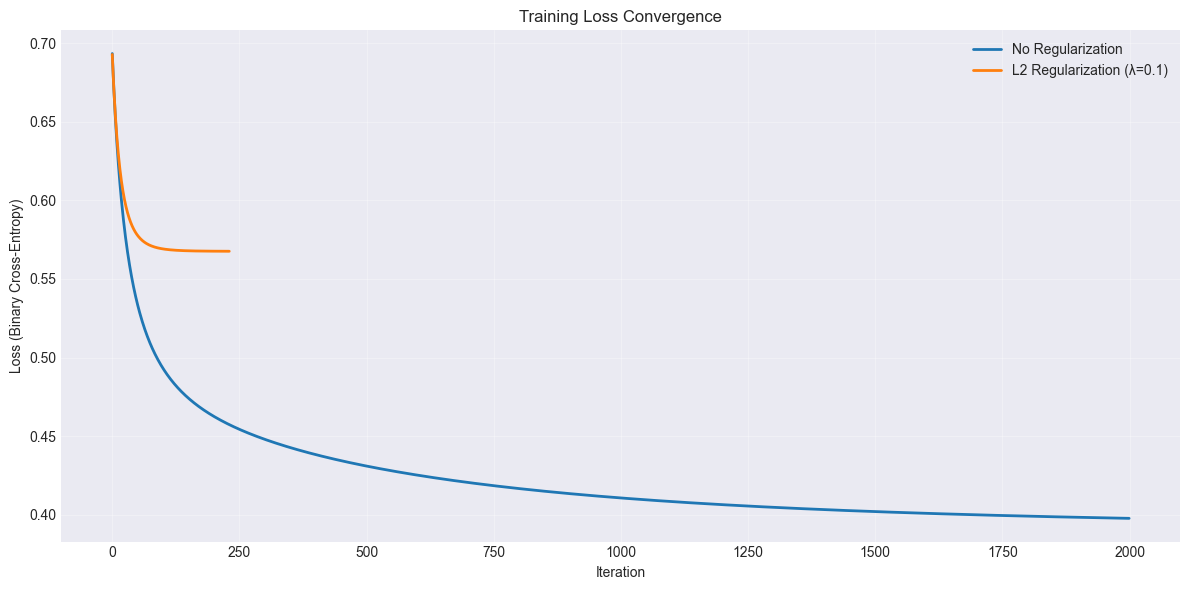

In [6]:
# Plot loss convergence
plt.figure(figsize=(12, 6))
plt.plot(model_no_reg.loss_history, label='No Regularization', linewidth=2)
plt.plot(model_with_reg.loss_history, label='L2 Regularization (λ=0.1)', linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.title('Training Loss Convergence')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## Model Evaluation


In [7]:
# Make predictions
y_pred_no_reg = model_no_reg.predict(X_test_scaled)
y_pred_with_reg = model_with_reg.predict(X_test_scaled)

# Calculate accuracy
acc_no_reg = model_no_reg.score(X_test_scaled, y_test)
acc_with_reg = model_with_reg.score(X_test_scaled, y_test)

print("Model Performance:")
print("=" * 50)
print(f"No Regularization:")
print(f"  Accuracy: {acc_no_reg:.4f}")
print(f"\nWith L2 Regularization (λ=0.1):")
print(f"  Accuracy: {acc_with_reg:.4f}")


Model Performance:
No Regularization:
  Accuracy: 0.8183

With L2 Regularization (λ=0.1):
  Accuracy: 0.7766


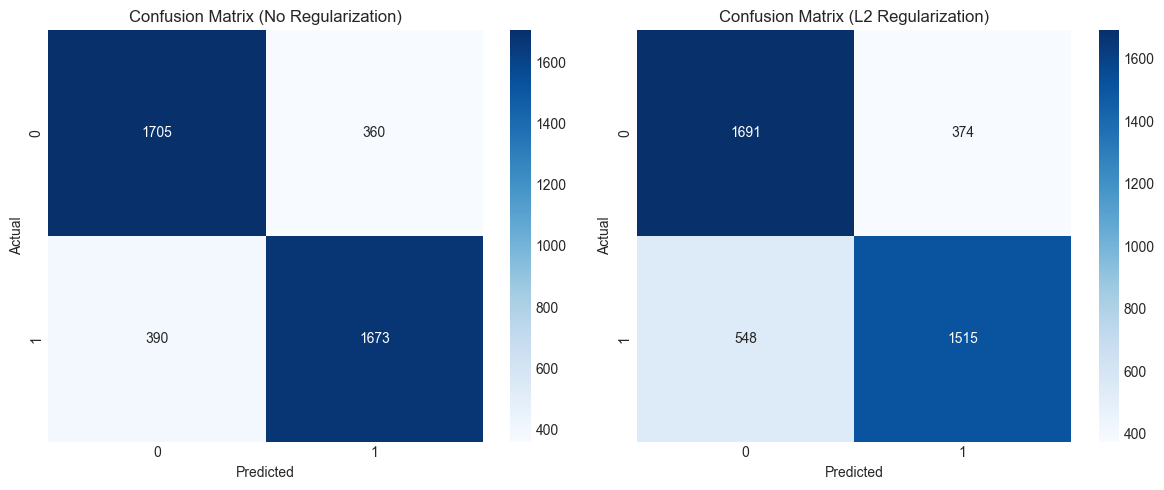

In [8]:
# Confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_no_reg = confusion_matrix(y_test, y_pred_no_reg)
cm_with_reg = confusion_matrix(y_test, y_pred_with_reg)

import seaborn as sns

sns.heatmap(cm_no_reg, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix (No Regularization)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(cm_with_reg, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix (L2 Regularization)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [9]:
# Classification reports
print("Classification Report - No Regularization:")
print(classification_report(y_test, y_pred_no_reg))

print("\nClassification Report - With L2 Regularization:")
print(classification_report(y_test, y_pred_with_reg))


Classification Report - No Regularization:
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2065
           1       0.82      0.81      0.82      2063

    accuracy                           0.82      4128
   macro avg       0.82      0.82      0.82      4128
weighted avg       0.82      0.82      0.82      4128


Classification Report - With L2 Regularization:
              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2065
           1       0.80      0.73      0.77      2063

    accuracy                           0.78      4128
   macro avg       0.78      0.78      0.78      4128
weighted avg       0.78      0.78      0.78      4128



## Visualizing Decision Boundary (2D Projection)

For visualization, we'll project the data onto the two most important features and visualize the decision boundary.


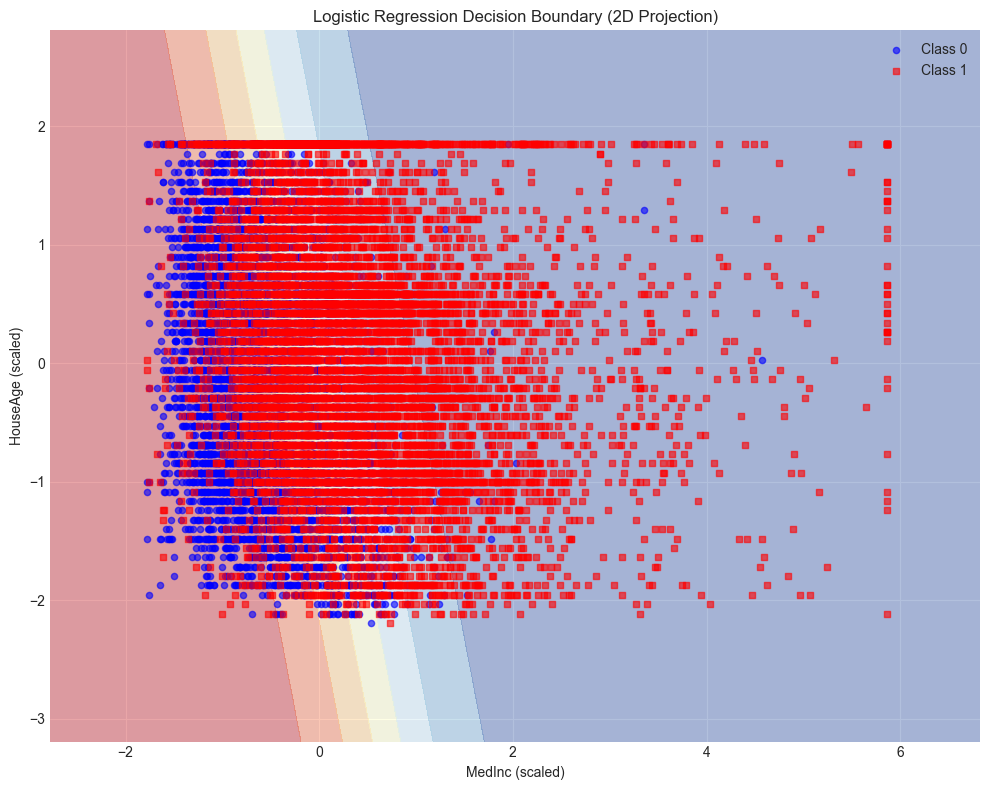

In [10]:
# Use two most correlated features for visualization
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

# Select two features (e.g., MedInc and AveRooms)
feature_idx = [0, 1]  # MedInc and HouseAge
X_2d = X_train_scaled[:, feature_idx]

# Train a 2D model for visualization
model_2d = LogisticRegression(learning_rate=0.1, max_iterations=1000, verbose=False)
model_2d.fit(X_2d, y_train)

# Create a mesh for decision boundary
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on mesh
Z = model_2d.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
plt.scatter(X_2d[y_train == 0, 0], X_2d[y_train == 0, 1], 
           c='blue', marker='o', label='Class 0', alpha=0.6, s=20)
plt.scatter(X_2d[y_train == 1, 0], X_2d[y_train == 1, 1], 
           c='red', marker='s', label='Class 1', alpha=0.6, s=20)
plt.xlabel('MedInc (scaled)')
plt.ylabel('HouseAge (scaled)')
plt.title('Logistic Regression Decision Boundary (2D Projection)')
plt.legend()
plt.tight_layout()
plt.show()
